### 单变量房价预测

In [1]:
import pandas as pd
import seaborn as sns

sns.set(context = "notebook", style = "whitegrid", palette = "RdBu")

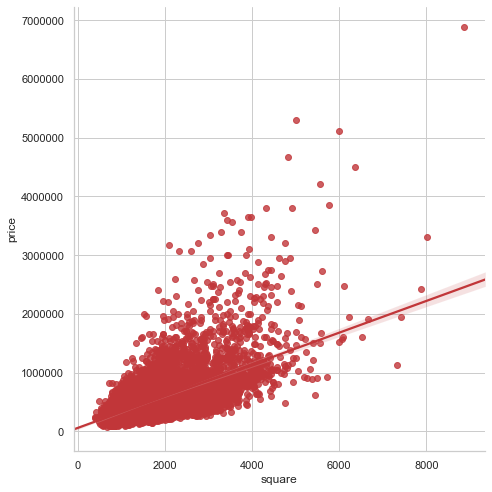

In [6]:
df0 = pd.read_csv('datas/04/train_2d.csv', names = ['square', 'price'])
sns.lmplot('square' , 'price', df0, height = 7, fit_reg = True)

In [3]:
df0.head(10)

,square,price
0,1240,545000
1,3300,785000
2,3190,765000
3,2900,720000
4,1200,449500
5,780,248500
6,1770,675000
7,1530,730000
8,860,311000
9,960,660000


In [4]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
square    10000 non-null int64
price     10000 non-null int64
dtypes: int64(2)
memory usage: 156.4 KB


### 多变量房价预测

In [7]:
#3D 数据分析
from mpl_toolkits import mplot3d
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('datas/04/train_3d.csv', names = ['square', 'bedrooms', 'price'])
df1.head()

,square,bedrooms,price
0,1240,3,545000
1,3300,4,785000
2,3190,3,765000
3,2900,5,720000
4,1200,5,449500


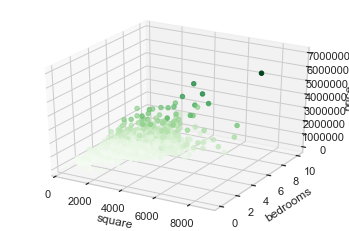

In [8]:
fig = plt.figure()
#设置为3D格式
ax = plt.axes(projection='3d')
ax.set_xlabel('square')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')

#前三个参数为设置坐标，c表示关于哪一个参数颜色的深浅有变化，cmap表示设置颜色
ax.scatter3D(df1['square'] , df1['bedrooms'] , df1['price'] , c = df1[ 'price' ] , cmap='Greens')

### 数据规范化

In [9]:
def normalize_feature(df):
    return df.apply(lambda column: (column - column.mean()) / column.std())

df = normalize_feature(df1)

df.head()

,square,bedrooms,price
0,-0.664869,-0.411568,0.005698
1,1.818707,0.708041,0.649258
2,1.686088,-0.411568,0.595628
3,1.336459,1.827651,0.474961
4,-0.713093,1.827651,-0.250385


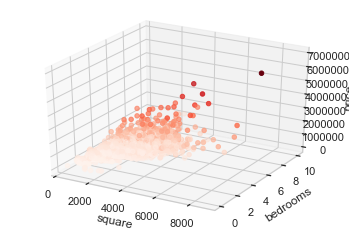

In [10]:
#设置为3D格式
ax = plt.axes(projection='3d')
ax.set_xlabel('square')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')

#前三个参数为设置坐标，c表示关于哪一个参数颜色的深浅有变化，cmap表示设置颜色
ax.scatter3D(df1['square'] , df1['bedrooms'] , df1['price'] , c = df1[ 'price' ] , cmap='Reds')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
square      10000 non-null float64
bedrooms    10000 non-null float64
price       10000 non-null float64
dtypes: float64(3)
memory usage: 234.5 KB


### 数据处理：添加 ones 列（x0）

In [12]:
import numpy as np

ones = pd.DataFrame({'ones': np.ones(len(df))})

,ones,square,bedrooms,price
0,1.0,-0.664869,-0.411568,0.005698
1,1.0,1.818707,0.708041,0.649258
2,1.0,1.686088,-0.411568,0.595628
3,1.0,1.336459,1.827651,0.474961
4,1.0,-0.713093,1.827651,-0.250385


In [13]:
ones.head()

,ones
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [ ]:
df = pd.concat([ones,df], axis=1)
df.head()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
ones        10000 non-null float64
square      10000 non-null float64
bedrooms    10000 non-null float64
price       10000 non-null float64
dtypes: float64(4)
memory usage: 312.6 KB
